# NASA SARP Comprehensive Python Cheatsheet (week 1)

It covers:
- Python basics: variables, conditionals, lists, dictionaries
- Tabular data using Pandas
- Scientific multidimensional data using Xarray
- Advanced data handling techniques
- NASA/Earth science-specific examples


## SECTION 1: Python Foundations

### 🔹 Variables and Data Types

In [52]:
name = "SARP"
age = 17
pm_value = 15.4
is_safe = pm_value < 35
print(f"Team: {name}, PM2.5: {pm_value}, Safe? {is_safe}")

Team: SARP, PM2.5: 15.4, Safe? True


### 🔹 Type Conversion

In [53]:
value = "100"
value_int = int(value)
print(value_int + 20)

120


### 🔹 Conditional Statements

In [54]:
temp = 87
if temp > 90:
    print("Too Hot")
elif temp > 75:
    print("Warm")
else:
    print("Mild")

Warm


### 🔹 Lists and List Operations

In [55]:
sensors = ["NO2", "CO", "PM2.5"]
sensors.append("O3")
sensors.remove("CO")
print(sensors)

['NO2', 'PM2.5', 'O3']


### 🔹 Dictionaries and Access

In [56]:
reading = {
    "location": "Pasadena", 
    "key2": 42.7, 
    "unit": "µg/m³"
}

print(reading['key2']) #returns 42.7

42.7


## SECTION 2: Tabular Data Analysis with Pandas

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

### 🔹 Load Titanic Dataset

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

# Example 1: Here we are showing how to import data that is hosted somewhere else
# (aka. website such as githubusercontent)
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv'
df = pd.read_csv(url)
df.head()


# Example 2: Here we are showing how to import data that is downloaded locally on your machine
df2 = pd.read_csv("example.csv")
df2.head()

,Name,Column1,Column2,Column3
0,Test,22,123,123
1,TEst2,2,12,123
2,Test3,3,421,123
3,Test4,4,34,34


### 🔹 Data Inspection & Summary

In [59]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

### 🔹 Handling Missing Data

In [60]:
df['age'] = df['age'].fillna(df['age'].mean())
df.dropna(subset=['embarked'], inplace=True)

### 🔹 Remove Duplicates

In [61]:
df = df.drop_duplicates()

### 🔹 Convert Data Types

In [62]:
df['sex'] = df['sex'].astype('category')

### 🔹 Outlier Removal using IQR

In [63]:
Q1 = df['fare'].quantile(0.25)
Q3 = df['fare'].quantile(0.75)
IQR = Q3 - Q1
filtered = df[(df['fare'] >= Q1 - 1.5*IQR) & (df['fare'] <= Q3 + 1.5*IQR)]

### 🔹 Feature Engineering

In [64]:
df['family_size'] = df['sibsp'] + df['parch'] + 1
df['fare_norm'] = (df['fare'] - df['fare'].min()) / (df['fare'].max() - df['fare'].min())

### 🔹 Filtering Rows with Conditions

In [65]:
high_fare = df[df['fare'] > 100]
high_fare[['sex', 'fare']].head()

,sex,fare
27,male,263.0000
31,female,146.5208
88,female,263.0000
118,male,247.5208
195,female,146.5208


### 🔹 Grouping and Aggregation

In [66]:
df.groupby('sex')['survived'].mean()

/tmp/ipykernel_804/300135932.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('sex')['survived'].mean()


sex
female    0.738832
male      0.215886
Name: survived, dtype: float64

### 🔹 Sorting Data

In [67]:
df.sort_values(by='age', ascending=False).head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,family_size,fare_norm
630,1,1,male,80.0,0,0,30.0000,S,First,man,True,A,Southampton,yes,True,1,0.058556
851,0,3,male,74.0,0,0,7.7750,S,Third,man,True,NaN,Southampton,no,True,1,0.015176
96,0,1,male,71.0,0,0,34.6542,C,First,man,True,A,Cherbourg,no,True,1,0.067640
493,0,1,male,71.0,0,0,49.5042,C,First,man,True,NaN,Cherbourg,no,True,1,0.096626
116,0,3,male,70.5,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True,1,0.015127


### 🔹 Pandas Visualizations

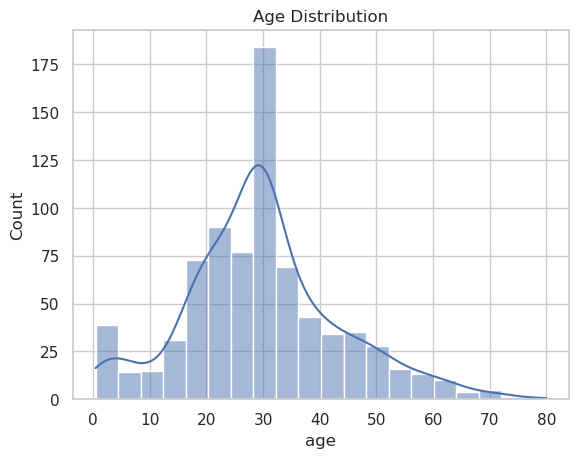

In [68]:
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

### 🔹 Save and Load

In [69]:
df.to_csv("cleaned_titanic.csv", index=False)
pd.read_csv("cleaned_titanic.csv")

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,family_size,fare_norm
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,2,0.014151
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,2,0.139136
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1,0.015469
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,2,0.103644
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,1,0.015713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,0,3,female,39.000000,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False,6,0.056848
778,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,1,0.058556
779,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,4,0.045771
780,1,1,male,26.000000,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,1,0.058556


## SECTION 3: Scientific Data Analysis with Xarray

In [70]:
import xarray as xr
xr.set_options(display_style='text')

In [71]:
url = 'http://test.opendap.org/opendap/data/nc/coads_climatology.nc'
ds = xr.open_dataset(url, decode_times=False)
ds

<xarray.Dataset> Size: 3MB
Dimensions:  (COADSX: 180, COADSY: 90, TIME: 12)
Coordinates:
  * COADSX   (COADSX) float64 1kB 21.0 23.0 25.0 27.0 ... 375.0 377.0 379.0
  * COADSY   (COADSY) float64 720B -89.0 -87.0 -85.0 -83.0 ... 85.0 87.0 89.0
  * TIME     (TIME) float64 96B 366.0 1.096e+03 ... 7.671e+03 8.401e+03
Data variables:
    SST      (TIME, COADSY, COADSX) float32 778kB ...
    AIRT     (TIME, COADSY, COADSX) float32 778kB ...
    UWND     (TIME, COADSY, COADSX) float32 778kB ...
    VWND     (TIME, COADSY, COADSX) float32 778kB ...
Attributes:
    history:                         FERRET V4.30 (debug/no GUI) 15-Aug-96
    DODS_EXTRA.Unlimited_Dimension:  TIME

In [72]:
sst = ds['SST']
sst_clean = sst.where(sst > -1e30)

### 🔹 Subset by Time and Region

In [73]:
sst_jan = sst_clean.isel(TIME=0)
sst_region = sst_jan.sel(COADSY=slice(-10, 10), COADSX=slice(120, 240))

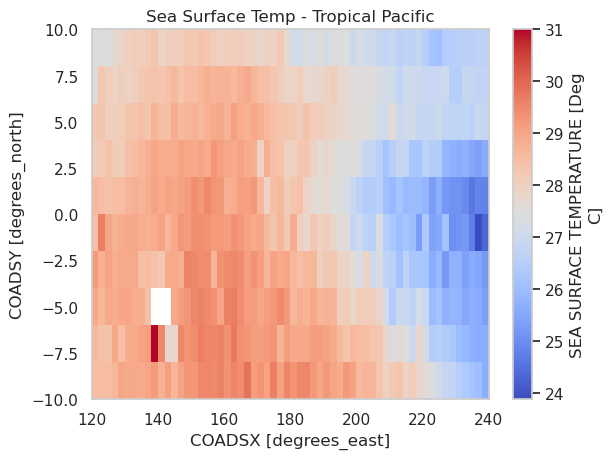

In [74]:
sst_region.plot(cmap='coolwarm')
plt.title("Sea Surface Temp - Tropical Pacific")
plt.show()

### 🔹 Compute Stats

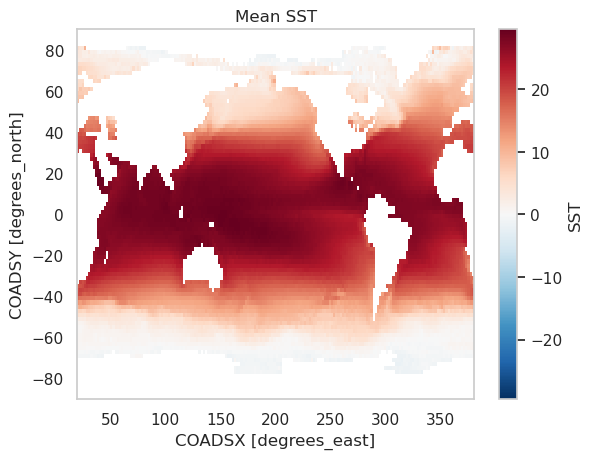

In [75]:
sst_mean = sst_clean.mean(dim='TIME')
sst_mean.plot()
plt.title("Mean SST")
plt.show()

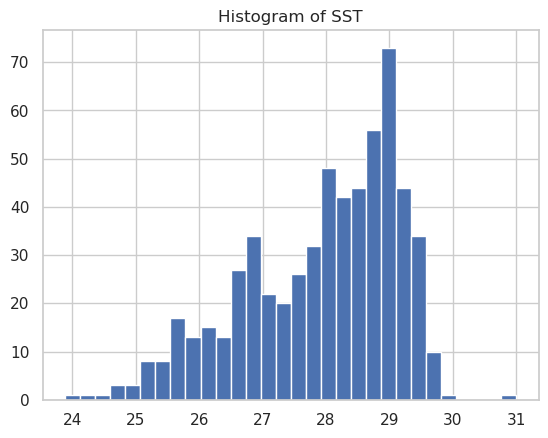

In [76]:
flat = sst_region.values.flatten()
flat = flat[~np.isnan(flat)]
plt.hist(flat, bins=30)
plt.title("Histogram of SST")
plt.show()

### 🔹 Export Subset

In [77]:
#sst_region.to_dataset(name='sst_subset').to_netcdf("sst_subset.nc")